<a href="https://colab.research.google.com/github/arutraj/.githubcl/blob/main/15_3_Understanding_Real_time_Audio_Capture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install google-colab
from google.colab import output
output.enable_custom_widget_manager()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.6 MB/s eta 0:00:00


In [17]:
!apt remove portaudio19-dev libportaudio2 libportaudiocpp0 --purge
!apt remove pyaudio --purge
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install pyaudio --no-cache-dir

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages will be REMOVED:
  libportaudio2* libportaudiocpp0* portaudio19-dev*
0 upgraded, 0 newly installed, 3 to remove and 49 not upgraded.
After this operation, 927 kB disk space will be freed.
(Reading database ... 123665 files and directories currently installed.)
Removing portaudio19-dev:amd64 (19.6.0-1.1) ...
Removing libportaudiocpp0:amd64 (19.6.0-1.1) ...
Removing libportaudio2:amd64 (19.6.0-1.1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_loader.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_adapter_opencl.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_proxy.so.2 is not a symbolic link

/sbin/ldconfig.real:

In [2]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libasound2-dev is already the newest version (1.2.6.1-1ubuntu1).
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 188 kB of archives.
After this operation, 927 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudiocpp0 amd64 19.6.0-1.1 [16.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 portaudio19-dev amd64 19.6.0-1.1 [106 kB]
Fetched 188 kB in 0s (935 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 123621 files and directories currently installed.)
Pre

In [3]:
!pip install pyaudio

  Using cached PyAudio-0.2.14.tar.gz (47 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyaudio: filename=PyAudio-0.2.14-cp310-cp310-linux_x86_64.whl size=63861 sha256=a96c6619480e6fd974ccac60cb6cc2f0b5bdc62cdf36a20d3c0f166b108d63ba
  Stored in directory: /root/.cache/pip/wheels/d6/21/f4/0b51d41ba79e51b16295cbb096ec49f334792814d545b508c5
Successfully built pyaudio


In [18]:
# import libraries and modules
%matplotlib inline

import pyaudio
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# create pyaudio instance
p = pyaudio.PyAudio()
# list available audio devices
num_host_apis = p.get_host_api_count()
for i in range(num_host_apis):
    info = p.get_host_api_info_by_index(i)
    print(f"Host API {i}: {info}")


Host API 0: {'index': 0, 'structVersion': 1, 'type': 8, 'name': 'ALSA', 'deviceCount': 0, 'defaultInputDevice': -1, 'defaultOutputDevice': -1}
Host API 1: {'index': 1, 'structVersion': 1, 'type': 7, 'name': 'OSS', 'deviceCount': 0, 'defaultInputDevice': -1, 'defaultOutputDevice': -1}


In [21]:
# list available audio devices
num_devices = p.get_device_count()
print(f"Found {num_devices} audio devices.")
for i in range(num_devices):
    info = p.get_device_info_by_index(i)
    print(f"Device {i}: {info['name']}, Input: {info['maxInputChannels'] > 0}, Output: {info['maxOutputChannels'] > 0}")


Found 0 audio devices.


In [23]:
try:
    default_input_device_info = p.get_default_input_device_info()
    default_input_device_index = default_input_device_info['index']
    print(f"Using default input device: {default_input_device_info['name']}")
except OSError:
    print("No default input device available. Please select a device from the list above.")
    # Get valid input from the user within the range of available devices.
    while True:
        try:
            selected_device_index = int(input("Enter the device index: "))
            if 0 <= selected_device_index < num_devices:
                break
            else:
                print(f"Invalid device index. Please enter a number between 0 and {num_devices - 1}.")
        except ValueError:
            print("Invalid input. Please enter a valid integer.")

    default_input_device_info = p.get_device_info_by_index(selected_device_index)
    default_input_device_index = selected_device_index
    print(f"Using selected input device: {default_input_device_info['name']}")

No default input device available. Please select a device from the list above.
Enter the device index: 0
Invalid device index. Please enter a number between 0 and -1.
Enter the device index: -1
Invalid device index. Please enter a number between 0 and -1.
Enter the device index: -.5
Invalid input. Please enter a valid integer.
Enter the device index: 1
Invalid device index. Please enter a number between 0 and -1.


KeyboardInterrupt: Interrupted by user

In [12]:
# define variables
chunk = 1024  # small segmetnt (frame) of audio
channels = 1
sample_rate = 16000
audio_format = pyaudio.paInt16

In [13]:
# create stream object
stream = p.open(
    format=audio_format,
    channels=channels,
    rate=sample_rate,
    input=True,
    frames_per_buffer=chunk,
    input_device_index=default_input_device_index  # Use the default input device
)

OSError: [Errno -9996] Invalid input device (no default output device)

In [9]:
p.get_host_api

AttributeError: 'PyAudio' object has no attribute 'get_host_api'

In [ ]:
# define threshold
threshold = 500

In [ ]:
# record and analyze audio
avg_values = []
print("Listening")
while True:
    # record a frame of audio
    frame = np.frombuffer(stream.read(chunk), dtype=np.int16)
    # calculate average values
    avg_value = np.average(np.abs(frame))
    avg_values.append(avg_value)
    if avg_value > threshold:
        print("You said something")

Listening
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
You said something
Yo

KeyboardInterrupt: 

In [ ]:
# close stream
stream.stop_stream()
stream.close()
p.terminate()

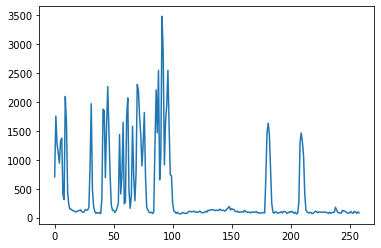

In [ ]:
# plot average values
plt.plot(avg_values)